In [3]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageOps

In [7]:
image1 = Image.open('bliss.jpg')
image1 = image1.convert('RGB')
image1.size

(2560, 1600)

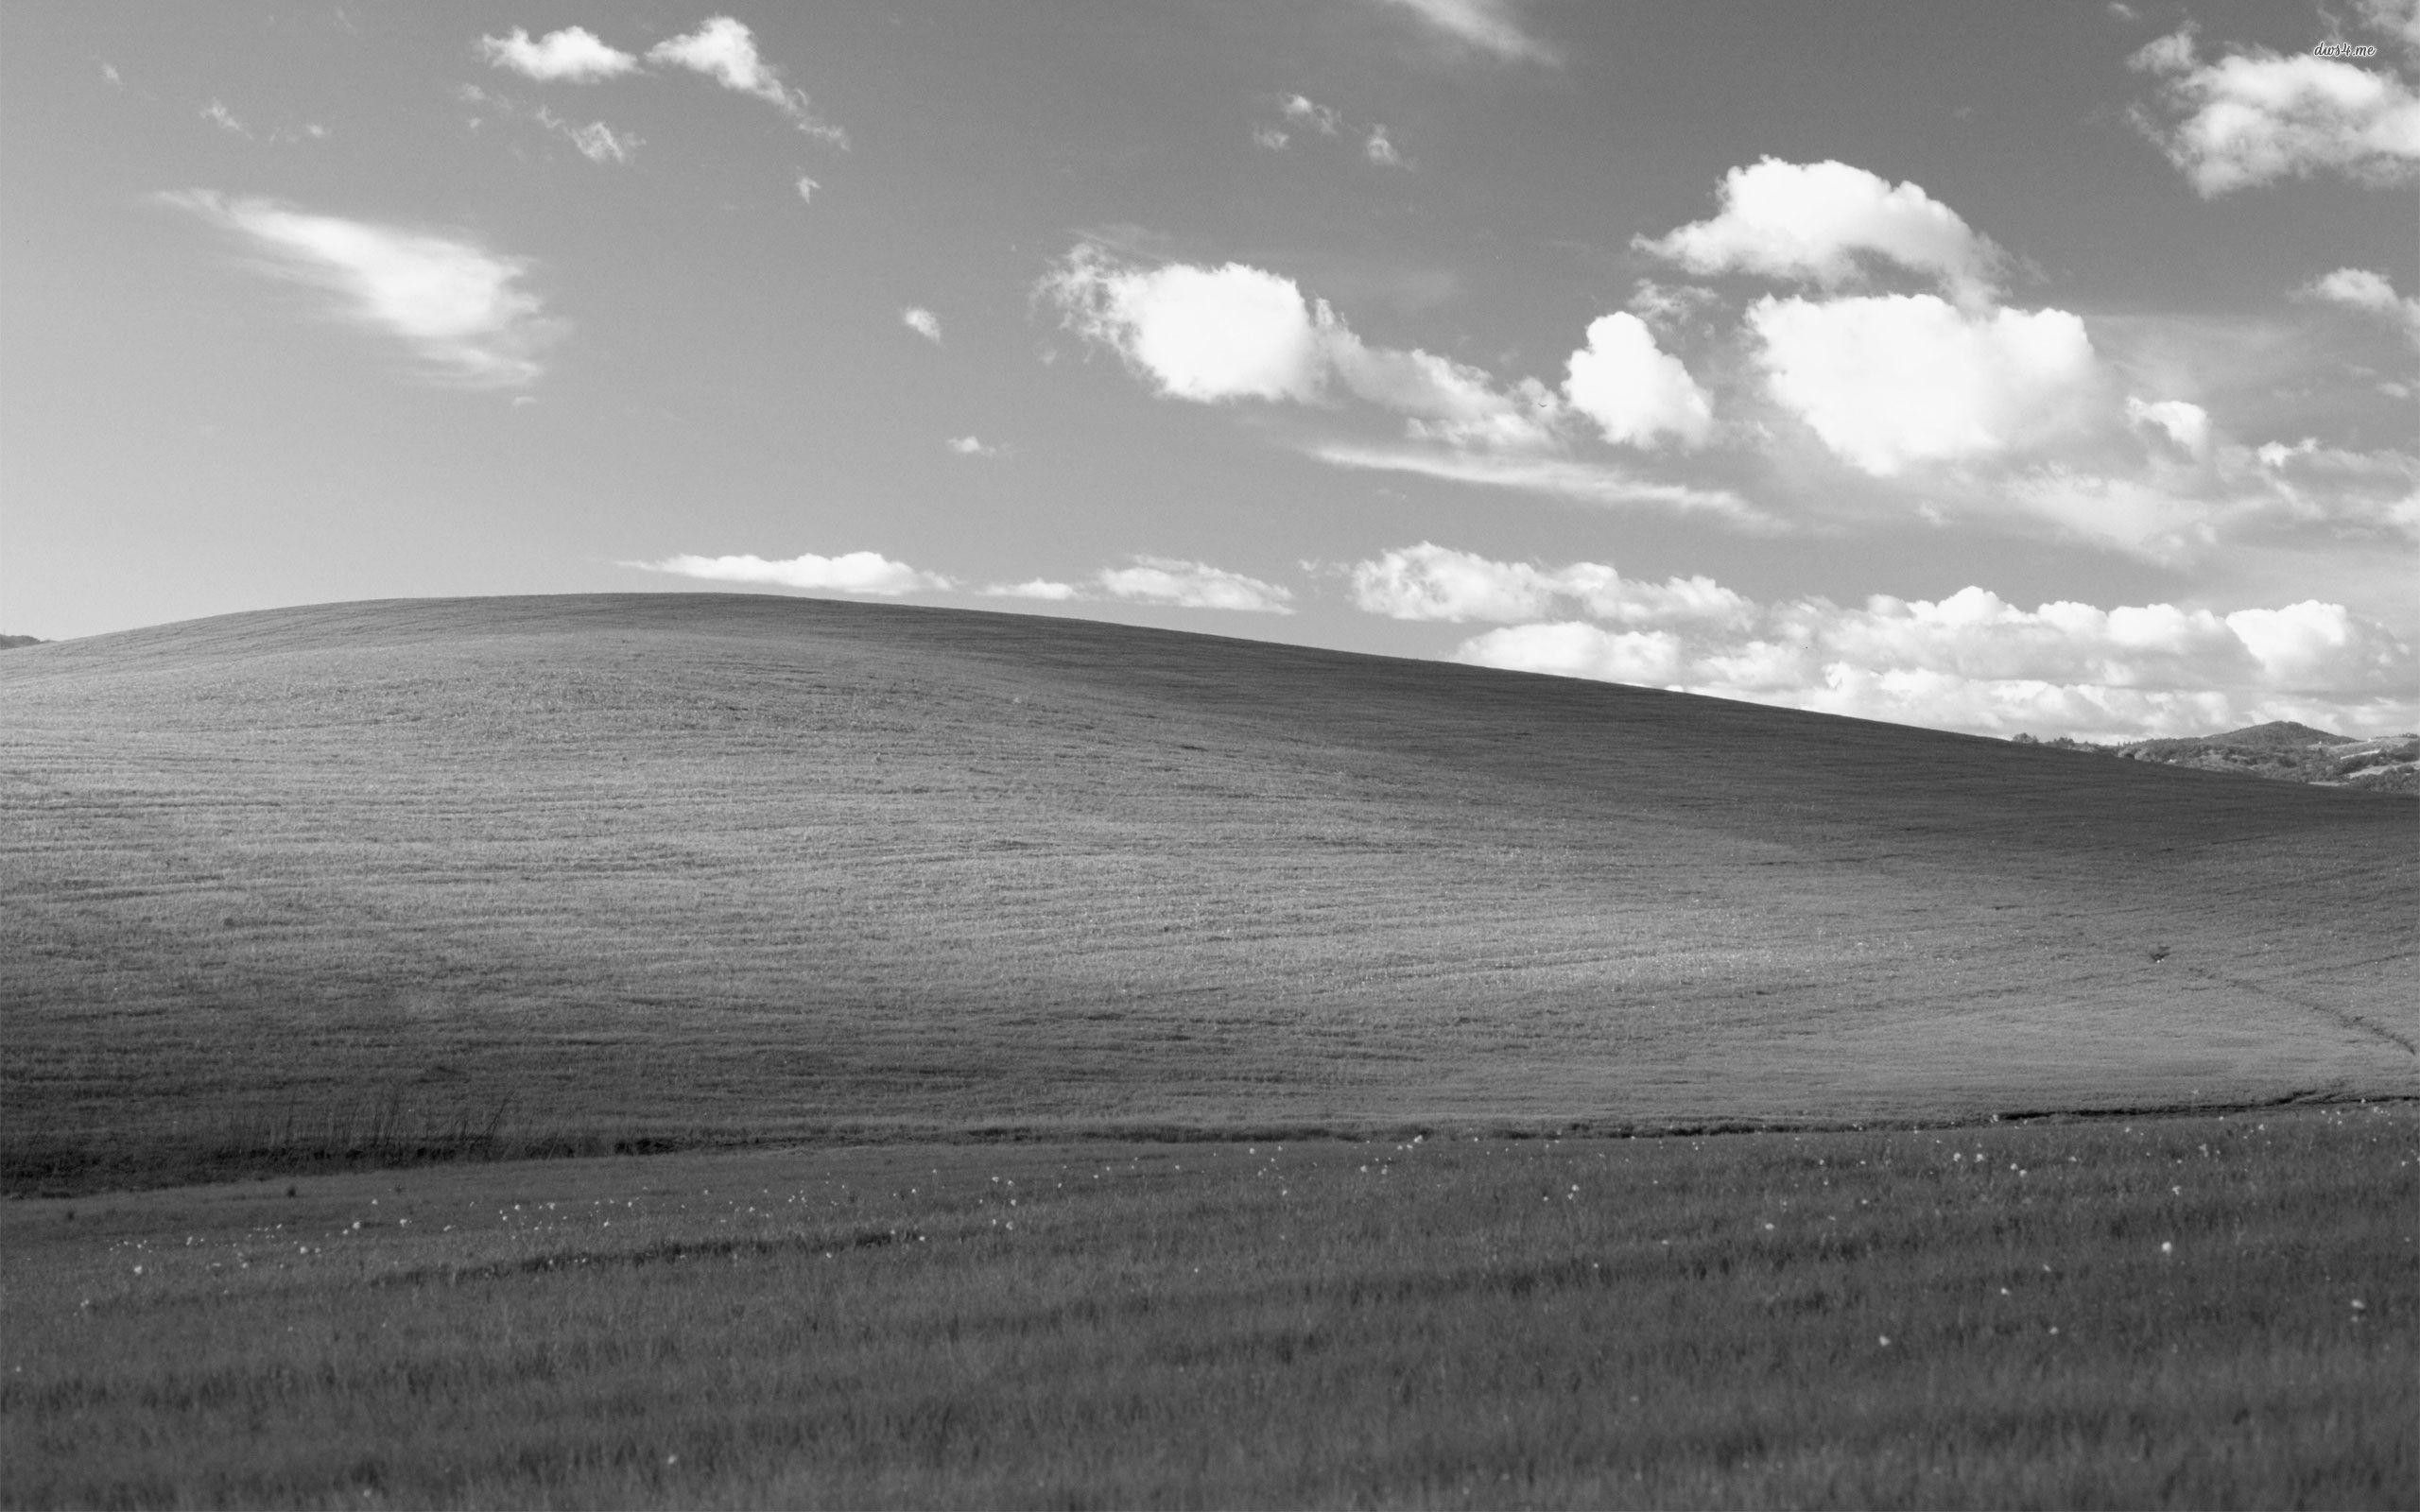

In [5]:

image2 = ImageOps.grayscale(image1)
image2

In [50]:
#define parametric model
def model_function(grayscale, w_0, w_1, w_2, w_3, w_4, w_5, w_6, w_7, w_8):
    grayscale = np.array(grayscale)
    red = (w_0 + w_1 * grayscale + w_2*grayscale**2)
    green = (w_3 + w_4*grayscale + w_5*grayscale**2)
    blue = (w_6 + w_7*grayscale + w_8*grayscale**2)
    
    return (red, green, blue)

In [43]:
# define loss function
# L = 1/N sum_i (hat{y}_i-y_i)^2
def loss_function(w_0, w_1, w_2, w_3, w_4, w_5, w_6, w_7, w_8, grayscale, ground_truth):
    result_red = (model_function(grayscale, w_0, w_1, w_2, w_3, w_4, w_5, w_6, w_7, w_8)[:][0] - ground_truth[:][0]) **2
    result_green = (model_function(grayscale, w_0, w_1, w_2, w_3, w_4, w_5, w_6, w_7, w_8)[:][1] - ground_truth[:][1]) **2
    result_blue = (model_function(grayscale, w_0, w_1, w_2, w_3, w_4, w_5, w_6, w_7, w_8)[:][2] - ground_truth[:][2]) **2
    
    result_red = result_red.mean()
    result_green = result_green.mean()
    result_blue = result_blue.mean()
    
    return (result_red, result_blue, result_green)


In [44]:
# gradient decsent to find the right theta0 and theta1
# L_0: dL/dw_0 = 1/N sum_i 2(hat{y}_i-y_i)
def L_0(w_0, w_1, w_2, w_3, w_4, w_5, w_6, w_7, w_8, grayscale, ground_truth):
    result_red = 2*(model_function(grayscale, w_0, w_1, w_2, w_3, w_4, w_5, w_6, w_7, w_8)[:][0] - ground_truth[:][0])
    result_green = 2*(model_function(grayscale, w_0, w_1, w_2, w_3, w_4, w_5, w_6, w_7, w_8)[:][1] - ground_truth[:][1])
    result_blue = 2*(model_function(grayscale, w_0, w_1, w_2, w_3, w_4, w_5, w_6, w_7, w_8)[:][2] - ground_truth[:][2])
    
    result_red = result_red.mean()
    result_green = result_green.mean()
    result_blue = result_blue.mean()
    
    return (result_red, result_blue, result_green)


In [45]:
# gradient decsent to find the right theta0 and theta1
# L_1: dL/dw_1 = 1/N sum_i 2(hat{y}_i-y_i)(x_i)
def L_1(w_0, w_1, w_2, w_3, w_4, w_5, w_6, w_7, w_8, grayscale, ground_truth):
    result_red = 2*(model_function(grayscale, w_0, w_1, w_2, w_3, w_4, w_5, w_6, w_7, w_8)[:][0] - ground_truth[:][0])*grayscale[:][0]
    result_green = 2*(model_function(grayscale, w_0, w_1, w_2, w_3, w_4, w_5, w_6, w_7, w_8)[:][1] - ground_truth[:][1])*grayscale[:][1]
    result_blue = 2*(model_function(grayscale, w_0, w_1, w_2, w_3, w_4, w_5, w_6, w_7, w_8)[:][2] - ground_truth[:][2])*grayscale[:][2]
    
    result_red = result_red.mean()
    result_green = result_green.mean()
    result_blue = result_blue.mean()
    
    return (result_red, result_blue, result_green)


In [46]:
# gradient decsent to find the right theta0 and theta1
# L_2: dL/dw_2 = 1/N sum_i 2(hat{y}_i-y_i)(x_i)^2
def L_2(w_0, w_1, w_2, w_3, w_4, w_5, w_6, w_7, w_8, grayscale, ground_truth):
    result_red = 2*(model_function(grayscale, w_0, w_1, w_2, w_3, w_4, w_5, w_6, w_7, w_8)[:][0] - ground_truth[:][0])*grayscale[:][0]**2
    result_green = 2*(model_function(grayscale, w_0, w_1, w_2, w_3, w_4, w_5, w_6, w_7, w_8)[:][1] - ground_truth[:][1])*grayscale[:][1]**2
    result_blue = 2*(model_function(grayscale, w_0, w_1, w_2, w_3, w_4, w_5, w_6, w_7, w_8)[:][2] - ground_truth[:][2])*grayscale[:][2]**2
    
    result_red = result_red.mean()
    result_green = result_green.mean()
    result_blue = result_blue.mean()
    
    return (result_red, result_blue, result_green)

In [53]:
# Stochastic gradient descent
# define parameters
num_iter = 1
alpha = 0.01 # step sz

# for SGD
batch_size = 1


# initialization
var_theta0 = 0.
var_theta1 = 0.
var_theta2 = 0.
var_theta3 = 0.
var_theta4 = 0.
var_theta5 = 0.
var_theta6 = 0.
var_theta7 = 0.
var_theta8 = 0.



for epoch in range(num_iter):
    for i in range(0, 2560, batch_size):
        for j in range(0, 800, batch_size):
            color = [image1.getpixel((i,j)), image1.getpixel((i+1,j)), image1.getpixel((i,j+1))]
            grayscale = [image2.getpixel((i,j)), image2.getpixel((i+1,j)), image2.getpixel((i,j+1))]
            #red
            d_theta0 = L_0(var_theta0,var_theta1,var_theta2,var_theta3,var_theta4,var_theta5,var_theta6,var_theta7,var_theta8,grayscale,color)[0]
            #print(d_theta0)
            d_theta1 = L_1(var_theta0,var_theta1,var_theta2,var_theta3,var_theta4,var_theta5,var_theta6,var_theta7,var_theta8,grayscale,color)[0]
            d_theta2 = L_2(var_theta0,var_theta1,var_theta2,var_theta3,var_theta4,var_theta5,var_theta6,var_theta7,var_theta8,grayscale,color)[0]
            print(d_theta1)
            
            #green
            d_theta3 = L_0(var_theta0,var_theta1,var_theta2,var_theta3,var_theta4,var_theta5,var_theta6,var_theta7,var_theta8,grayscale,color)[1]
            d_theta4 = L_1(var_theta0,var_theta1,var_theta2,var_theta3,var_theta4,var_theta5,var_theta6,var_theta7,var_theta8,grayscale,color)[1]
            d_theta5 = L_2(var_theta0,var_theta1,var_theta2,var_theta3,var_theta4,var_theta5,var_theta6,var_theta7,var_theta8,grayscale,color)[1]
            
            #blue
            d_theta6 = L_0(var_theta0,var_theta1,var_theta2,var_theta3,var_theta4,var_theta5,var_theta6,var_theta7,var_theta8,grayscale,color)[2]
            d_theta7 = L_1(var_theta0,var_theta1,var_theta2,var_theta3,var_theta4,var_theta5,var_theta6,var_theta7,var_theta8,grayscale,color)[2]
            d_theta8 = L_2(var_theta0,var_theta1,var_theta2,var_theta3,var_theta4,var_theta5,var_theta6,var_theta7,var_theta8,grayscale,color)[2]
            
            #update variables
            var_theta0 = var_theta0 - alpha * d_theta0
            var_theta1 = var_theta1 - alpha * d_theta1
            var_theta2 = var_theta2 - alpha * d_theta2
            var_theta3 = var_theta3 - alpha * d_theta3
            var_theta4 = var_theta4 - alpha * d_theta4
            var_theta5 = var_theta5 - alpha * d_theta5
            var_theta6 = var_theta6 - alpha * d_theta6
            var_theta7 = var_theta7 - alpha * d_theta7
            var_theta8 = var_theta8 - alpha * d_theta8
        
    # logging after each epoch (finishing all batches)
    if epoch % 10 == 0:
        print('iteration %d:' % (epoch))
        print(var_theta0)
        #print('loss: %f' % (L(var_theta0, var_theta1, x, y)))
        #print('gradient: dL/dtheta0 = %f, dL/dtheta1 = %f' % (d_theta0, d_theta1))
        #y_pred = f(var_theta0, var_theta1, x)
        #plt.figure()
        #plt.scatter(x,y)
        #plt.plot(x, y_pred)

-62560.0
973209875572.4801
-1.4661127100779756e+19
2.160355876035279e+26
-3.1775365006948844e+33
4.788610106868838e+40
-7.379174453949674e+47
1.1366720525311293e+55
-1.687856348585656e+62
2.4075004724805237e+69
-3.413038095565855e+76
4.928763604319033e+83
-7.471373268902451e+90
1.1811367990683098e+98
-1.8969998173333219e+105
2.9870252101250898e+112
-4.292997074872092e+119
6.161478748487295e+126
-9.340011271390393e+133
1.4765466292882145e+141
-2.3433085002527938e+148
3.5870371370024598e+155
-5.199407659434709e+162
7.343038223084106e+169
-1.1037612484545055e+177
1.720677778400862e+184
-2.6878770594371067e+191
4.1987425975524966e+198
-6.558871187432148e+205
1.0245636700474047e+213
-1.6003204354229592e+220
2.4945947311577664e+227
-3.9040432214500824e+234
6.012856286436242e+241
-9.078068049094212e+248
1.393134852946845e+256
-2.2246703615465067e+263
3.6013901045878276e+270
-5.66919536569934e+277
8.661794678489605e+284
-1.3131659885383862e+292
2.0146521841869092e+299
-3.1094426349403673e+306


<ipython-input-46-61c86a56ea84>:4: RuntimeWarning: overflow encountered in multiply
  result_red = 2*(model_function(grayscale, w_0, w_1, w_2, w_3, w_4, w_5, w_6, w_7, w_8)[:][0] - ground_truth[:][0])*grayscale[:][0]**2
<ipython-input-46-61c86a56ea84>:6: RuntimeWarning: overflow encountered in multiply
  result_blue = 2*(model_function(grayscale, w_0, w_1, w_2, w_3, w_4, w_5, w_6, w_7, w_8)[:][2] - ground_truth[:][2])*grayscale[:][2]**2
<ipython-input-53-286d9b3b30c4>:47: RuntimeWarning: invalid value encountered in double_scalars
  var_theta2 = var_theta2 - alpha * d_theta2
<ipython-input-53-286d9b3b30c4>:50: RuntimeWarning: invalid value encountered in double_scalars
  var_theta5 = var_theta5 - alpha * d_theta5
<ipython-input-53-286d9b3b30c4>:53: RuntimeWarning: invalid value encountered in double_scalars
  var_theta8 = var_theta8 - alpha * d_theta8



nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan

KeyboardInterrupt: 

In [37]:
data = np.zeros((2560,1600, 3), dtype=np.uint8)
for i in range(0, 2560):
    for j in range(0, 1600):
        r,g,b = model_function(image2.getpixel((i,j)), var_theta0, var_theta1,var_theta2,var_theta3,var_theta4,var_theta5,var_theta6,var_theta7,var_theta8)
        print(var_theta0)
        print(r,g,b)
        data[i][j] = [r,g,b]
image3 = Image.fromarray(data, 'RGB')
image3

nan
nan nan nan


ValueError: cannot convert float NaN to integer